# This script contains:
1. Import Libraries and Dataset
2. Top 10 departments
3. Relation between regions and departments
4. Question 8 I. Age_group and Region|Department Relation
              II. Income_group and Region|Department Relation
              III. Dependents_group and Region|Department Relations

# 1. Import Libraries and Dataset

In [163]:
# Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [165]:
# Defining Path
path= r'/Users/navneetjha/Desktop/Career foundry Docs/exercises/Data Immersion /Achievement 4/INSTACART BASKET ANALYSIS JULY14-2024'

In [27]:
# Import Dataset
df=pd.read_pickle(os.path.join(path,'02 DATA', 'PREPARED DATA','All_variables_customer_order_productcleaned.pkl'))

In [28]:
df.shape

(24436791, 36)

In [31]:
# Import department dataset
df_department=pd.read_csv(os.path.join(path,'02 DATA','PREPARED DATA','departments_wrangled.csv'),index_col=False)

In [33]:
df_department.columns

Index(['Unnamed: 0', 'department'], dtype='object')

In [35]:
#Renaming Unnamed:0 as department_id
df_department.rename(columns={'Unnamed: 0': 'department_id'}, inplace=True)

In [37]:
df_department

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


# 2.Top 10 departments

In [39]:
#Merging df_department and df
df_3=df.merge(df_department,on='department_id',indicator=False)

In [40]:
df_3.shape

(24436791, 37)

In [45]:
df_3.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_dow,order_hour_of_day,...,date_joined,number_of_dependents,marital_status,income,region,high/low_activity,age_group,income_group,dependents_group,department
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,8/1/2019,1,married,49620,Midwest,high-activity,senior,low,young_parent,snacks
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,8/1/2019,1,married,49620,Midwest,high-activity,senior,low,young_parent,snacks
2,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,16,1,7,...,1/4/2019,2,married,57797,West,high-activity,adult,low-middle,young_parent,snacks
3,1,Chocolate Sandwich Cookies,61,19,5.8,1290456,910,12,3,10,...,7/25/2019,0,divorced/widowed,44856,South,high-activity,adult,low,single_adult,snacks
4,1,Chocolate Sandwich Cookies,61,19,5.8,369558,1052,10,1,20,...,3/30/2018,1,married,153843,West,high-activity,senior,upper-middle,young_parent,snacks


In [47]:
df_3['department'].value_counts()

department
produce            7227091
dairy eggs         4132060
snacks             2187121
beverages          2036466
frozen             1628844
pantry             1385520
bakery              886698
canned goods        787790
deli                783011
dry goods pasta     633725
household           539349
breakfast           530401
meat seafood        523891
babies              335947
personal care       328569
international       197900
alcohol             108002
pets                 72115
missing              57567
bulk                 27558
other                27166
Name: count, dtype: int64

Text(0, 0.5, 'No. of Products Sold')

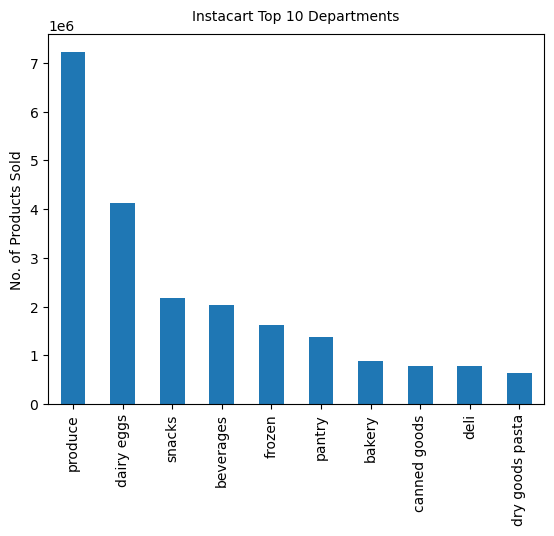

In [49]:
#Creating visualisation
bar=df_3['department'].value_counts().sort_values(ascending = False).head(10).plot.bar()
plt.title('Instacart Top 10 Departments', size=10, pad=10)
plt.xlabel('')
plt.ylabel('No. of Products Sold')

In [51]:
# Export Visualization
bar.figure.savefig(os.path.join(path,'04 ANALYSIS','VISUALIZATIONS','Top_ten_departments.png'))

In [53]:
#Using aggregation for usage frequencies
df_3.groupby('department').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                                  mean  min   max
department                                       
alcohol                       9.187922  0.0  30.0
babies                        9.195501  0.0  30.0
bakery                       10.082295  0.0  30.0
beverages                    10.045362  0.0  30.0
breakfast                    10.270054  0.0  30.0
bulk                          9.229117  0.0  30.0
canned goods                 10.588004  0.0  30.0
dairy eggs                    9.997722  0.0  30.0
deli                         10.292936  0.0  30.0
dry goods pasta              10.671335  0.0  30.0
frozen                       10.635101  0.0  30.0
household                    10.857654  0.0  30.0
international                10.240071  0.0  30.0
meat seafood                 10.375401  0.0  30.0
missing                       9.630379  0.0  30.0
other                         9.931017  0.0  30.0
pantry                       10.067624  0.0  30.0
personal care                10.497807  0.0  30.0
pets                         10.899494  0.0  30.0
produce                       9.874329  0.0  30.0
snacks                        9.961112  0.0  30.0

In [54]:
#Using aggregation for expenditure
df_3.groupby('department').agg({'prices': ['mean', 'min', 'max']})

prices           
                      mean  min   max
department                           
alcohol           8.163934  1.0  15.0
babies            7.619636  1.0  15.0
bakery            7.875917  1.0  15.0
beverages         7.693826  1.0  15.0
breakfast         8.074853  1.0  14.9
bulk              8.327531  1.4  14.1
canned goods      7.559775  1.0  15.0
dairy eggs        8.357032  1.0  15.0
deli              7.803717  1.0  15.0
dry goods pasta   7.340495  1.0  15.0
frozen            7.734763  1.0  15.0
household         7.363016  1.0  15.0
international     7.693059  1.0  15.0
meat seafood     16.299589  8.0  25.0
missing           8.651804  1.0  15.0
other             6.930255  1.1  15.0
pantry            8.022118  1.0  20.0
personal care     8.012822  1.0  15.0
pets              7.882158  1.0  15.0
produce           7.977830  1.0  15.0
snacks            4.274953  1.6   7.0

# 2. Relation between regions and departments

In [57]:
# Comparing Regions and departments
region_department_crosstab= pd.crosstab(df_3['region'], df_3['department'], normalize='index')

In [59]:
region_department_crosstab

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
region,,,,,,,,,,,,,,,,,,,,,
Midwest,0.004474,0.013731,0.036045,0.082611,0.021513,0.001135,0.032221,0.168792,0.031966,0.025982,...,0.022472,0.008153,0.021366,0.002420,0.001099,0.057098,0.013611,0.002883,0.296658,0.089066
Northeast,0.004293,0.013788,0.036653,0.085165,0.021698,0.001064,0.031937,0.169429,0.032308,0.025630,...,0.022324,0.007985,0.021371,0.002380,0.001142,0.056431,0.013398,0.003260,0.293870,0.090227
South,0.004457,0.014008,0.036124,0.083650,0.021658,0.001129,0.032342,0.169044,0.031912,0.025894,...,0.021751,0.008040,0.021377,0.002369,0.001131,0.056362,0.013584,0.002829,0.296106,0.089102
West,0.004409,0.013397,0.036460,0.082329,0.021946,0.001163,0.032325,0.169195,0.032098,0.026149,...,0.021947,0.008203,0.021632,0.002264,0.001078,0.056953,0.013148,0.002960,0.295741,0.089916


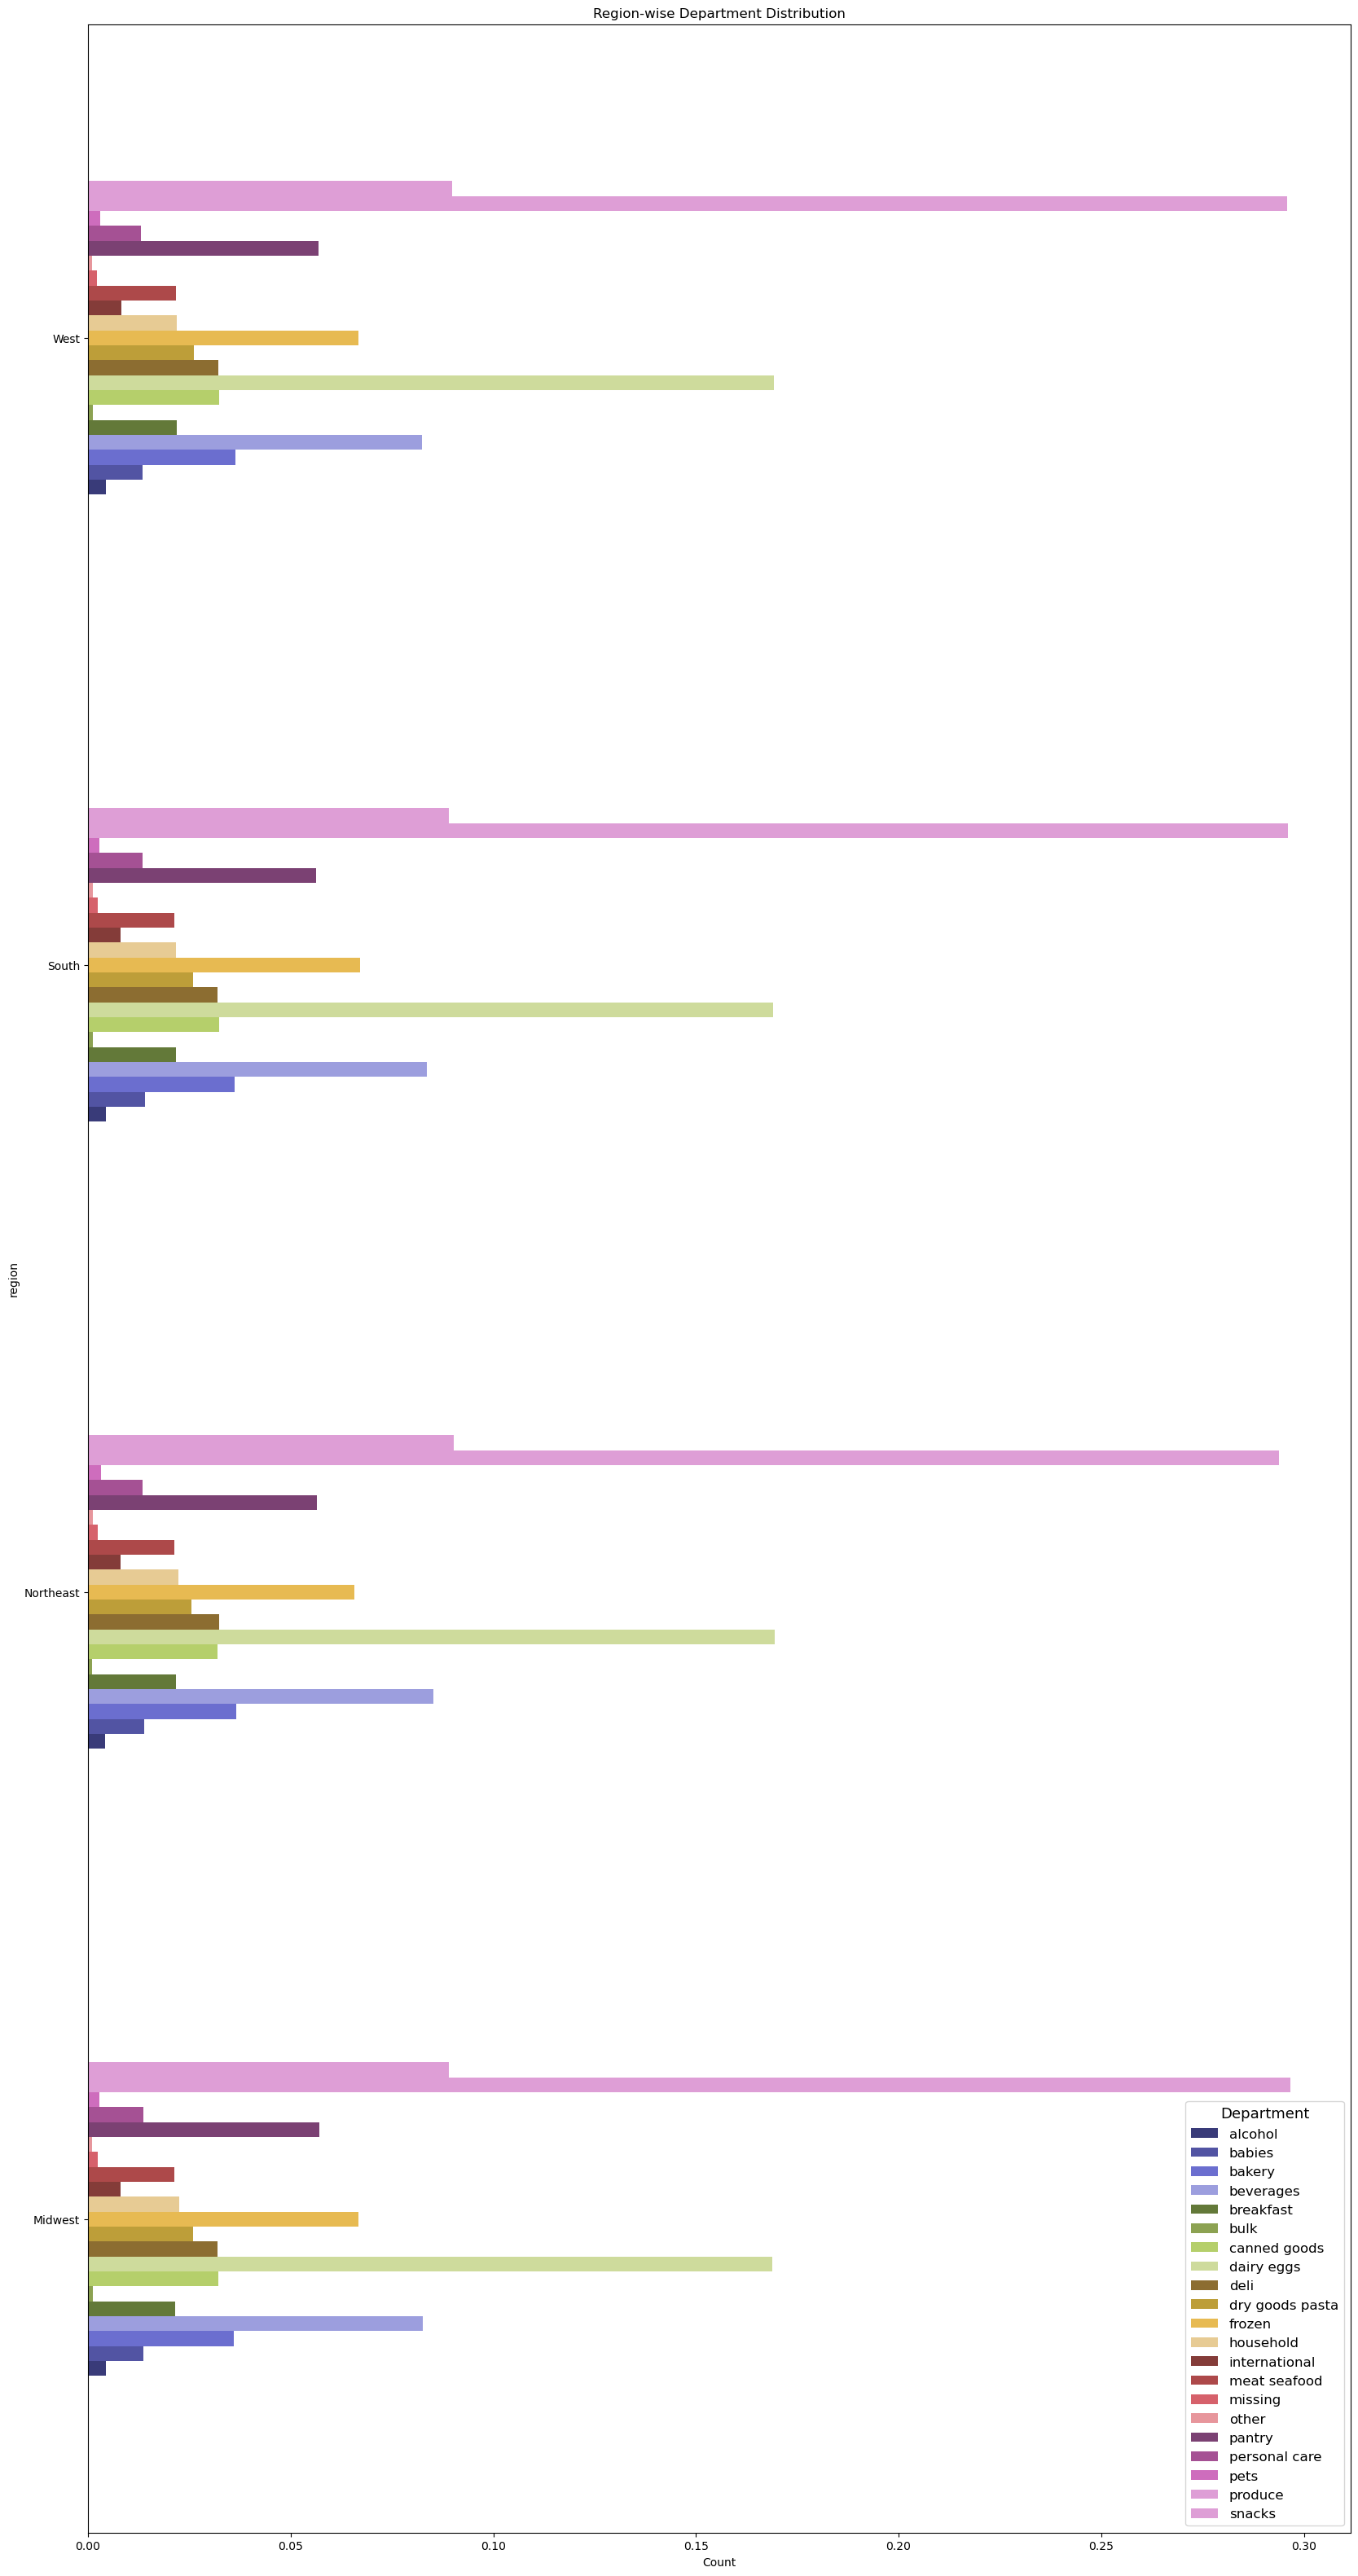

In [61]:
#Creating region_department_crosstab visualization
region_department_distribution_bar=region_department_crosstab.plot(kind='barh', stacked=False,figsize=(20,40),rot=0,colormap='tab20b')

# Adding titles and labels
plt.title('Region-wise Department Distribution')
plt.xlabel('Count')
plt.ylabel('region')
plt.legend(title='Department',title_fontsize='13', fontsize='12')

# Show the plot
plt.show()

In [63]:
#Export visualization
region_department_distribution_bar.figure.savefig(os.path.join(path,'04 ANALYSIS','VISUALIZATIONS','region-wise_department_distribution.png'))

In [65]:
df_3.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'add_to_cart_order', 'reordered', '_merge',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_product_price', 'spending_flag', 'median_days_between_orders',
       'order_frequency', 'first name', 'surname', 'gender', 'state', 'age',
       'date_joined', 'number_of_dependents', 'marital_status', 'income',
       'region', 'high/low_activity', 'age_group', 'income_group',
       'dependents_group', 'department'],
      dtype='object')

# 3. Question 8 I. Age_group and Region|Department Relation

In [69]:
# Comparing age_group and region
Age_group_region_crosstab= pd.crosstab(df_3['age_group'], df_3['region'], normalize='index')

In [71]:
#Printing Age_group_region_crosstab
Age_group_region_crosstab

region,Midwest,Northeast,South,West
age_group,,,,
adult,0.235123,0.174965,0.332904,0.257008
senior,0.231911,0.181240,0.329374,0.257475
young_adult,0.231990,0.176808,0.340370,0.250832


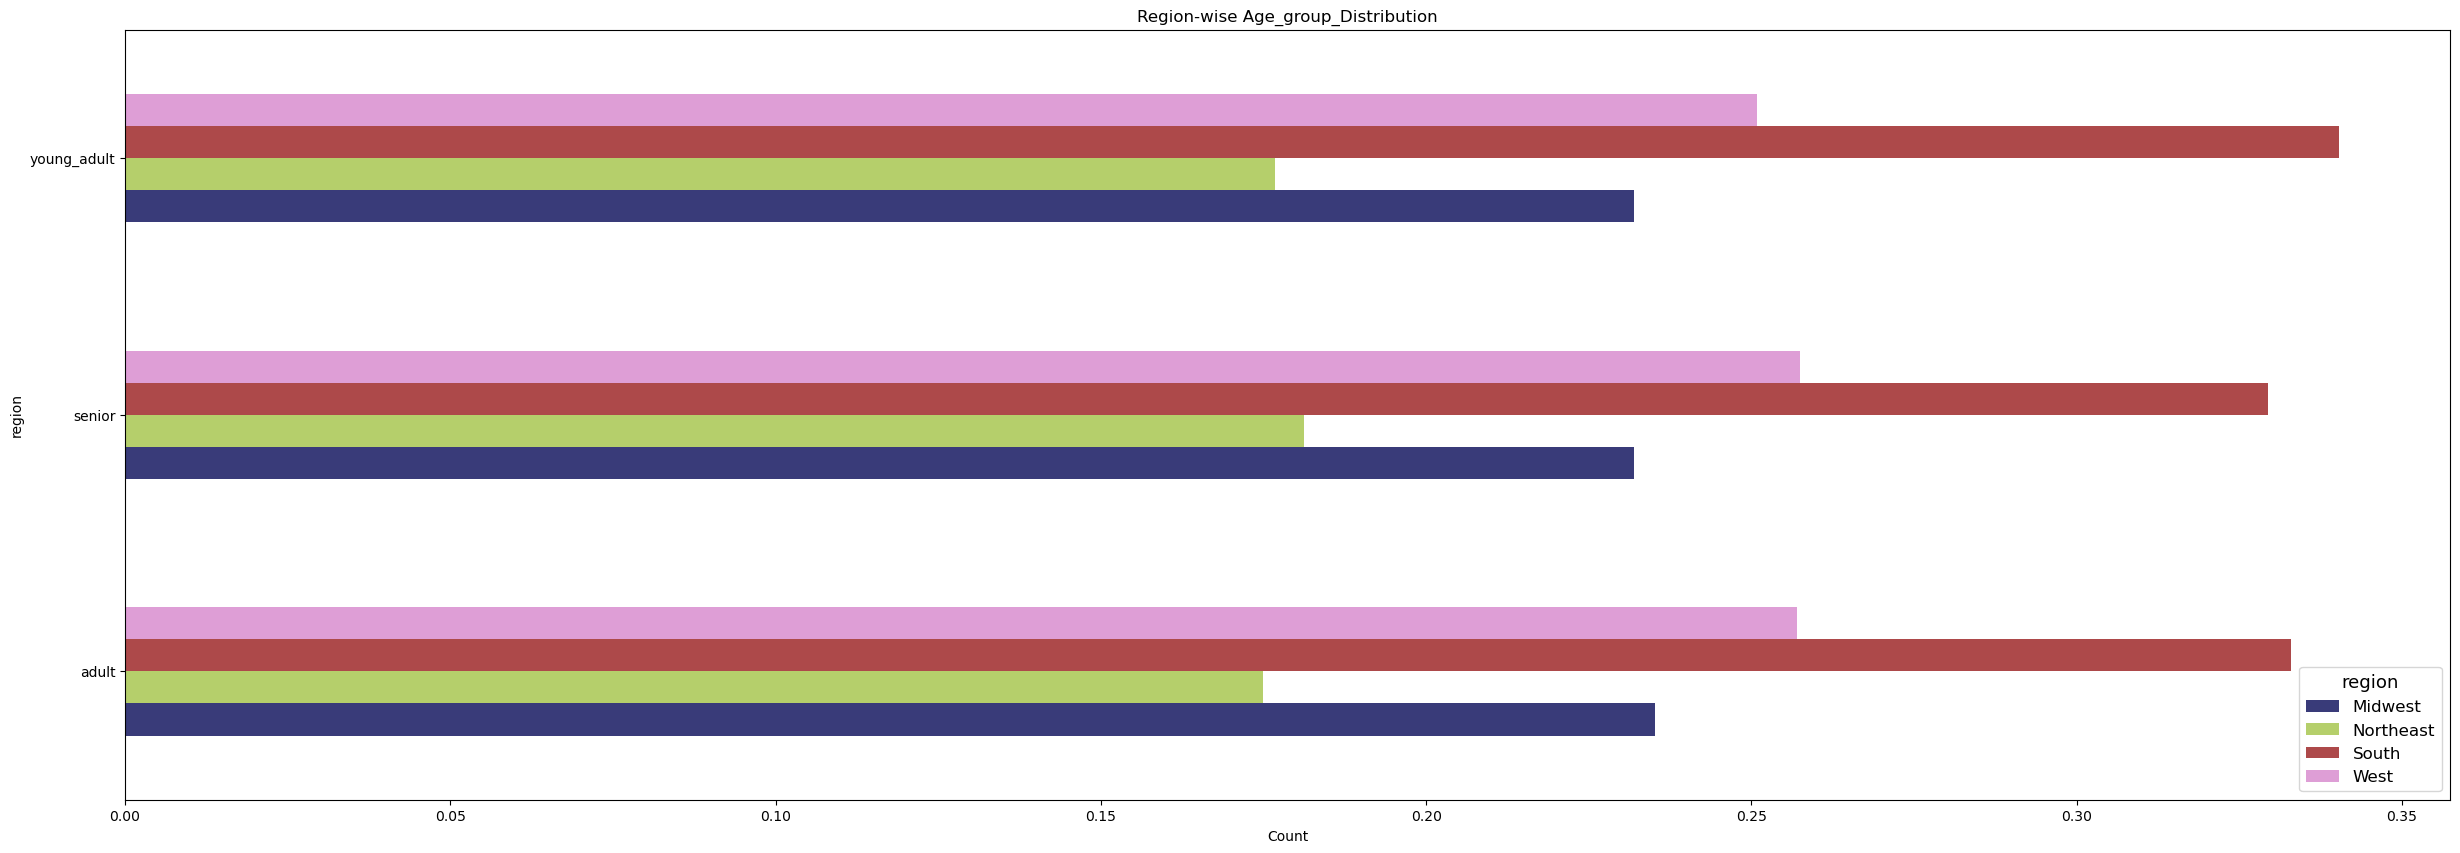

In [122]:
#Visualizing Age_group_region_crosstab
Age_group_region_bar=Age_group_region_crosstab.plot(kind='barh', stacked=False,figsize=(30,10),rot=0,colormap='tab20b')

# Adding titles and labels
plt.title('Region-wise Age_group_Distribution')
plt.xlabel('Count')
plt.ylabel('region')
plt.legend(title='region',title_fontsize='13', fontsize='12')

# Show the plot
plt.show()

In [77]:
#Export visualization
Age_group_region_bar.figure.savefig(os.path.join(path,'04 ANALYSIS','VISUALIZATIONS','region-wise_age_group_distribution.png'))

In [79]:
# Comparing age_group and department
Age_group_department_crosstab= pd.crosstab(df_3['age_group'], df_3['department'], normalize='index')

In [83]:
#Printing Age_group_department_crosstab
Age_group_department_crosstab

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
age_group,,,,,,,,,,,,,,,,,,,,,
adult,0.004446,0.013936,0.036387,0.083166,0.021725,0.001122,0.032297,0.169138,0.032114,0.025837,...,0.022002,0.008134,0.021276,0.002358,0.001114,0.056725,0.013517,0.002863,0.295812,0.089580
senior,0.004198,0.013349,0.036033,0.084040,0.021372,0.001122,0.032129,0.168788,0.032022,0.025952,...,0.022301,0.007980,0.021764,0.002305,0.001078,0.056686,0.013252,0.003049,0.296266,0.089237
young_adult,0.004730,0.013602,0.036281,0.082782,0.022269,0.001170,0.032161,0.169467,0.031726,0.026379,...,0.021957,0.008155,0.021602,0.002445,0.001168,0.056588,0.013476,0.003199,0.294376,0.089634


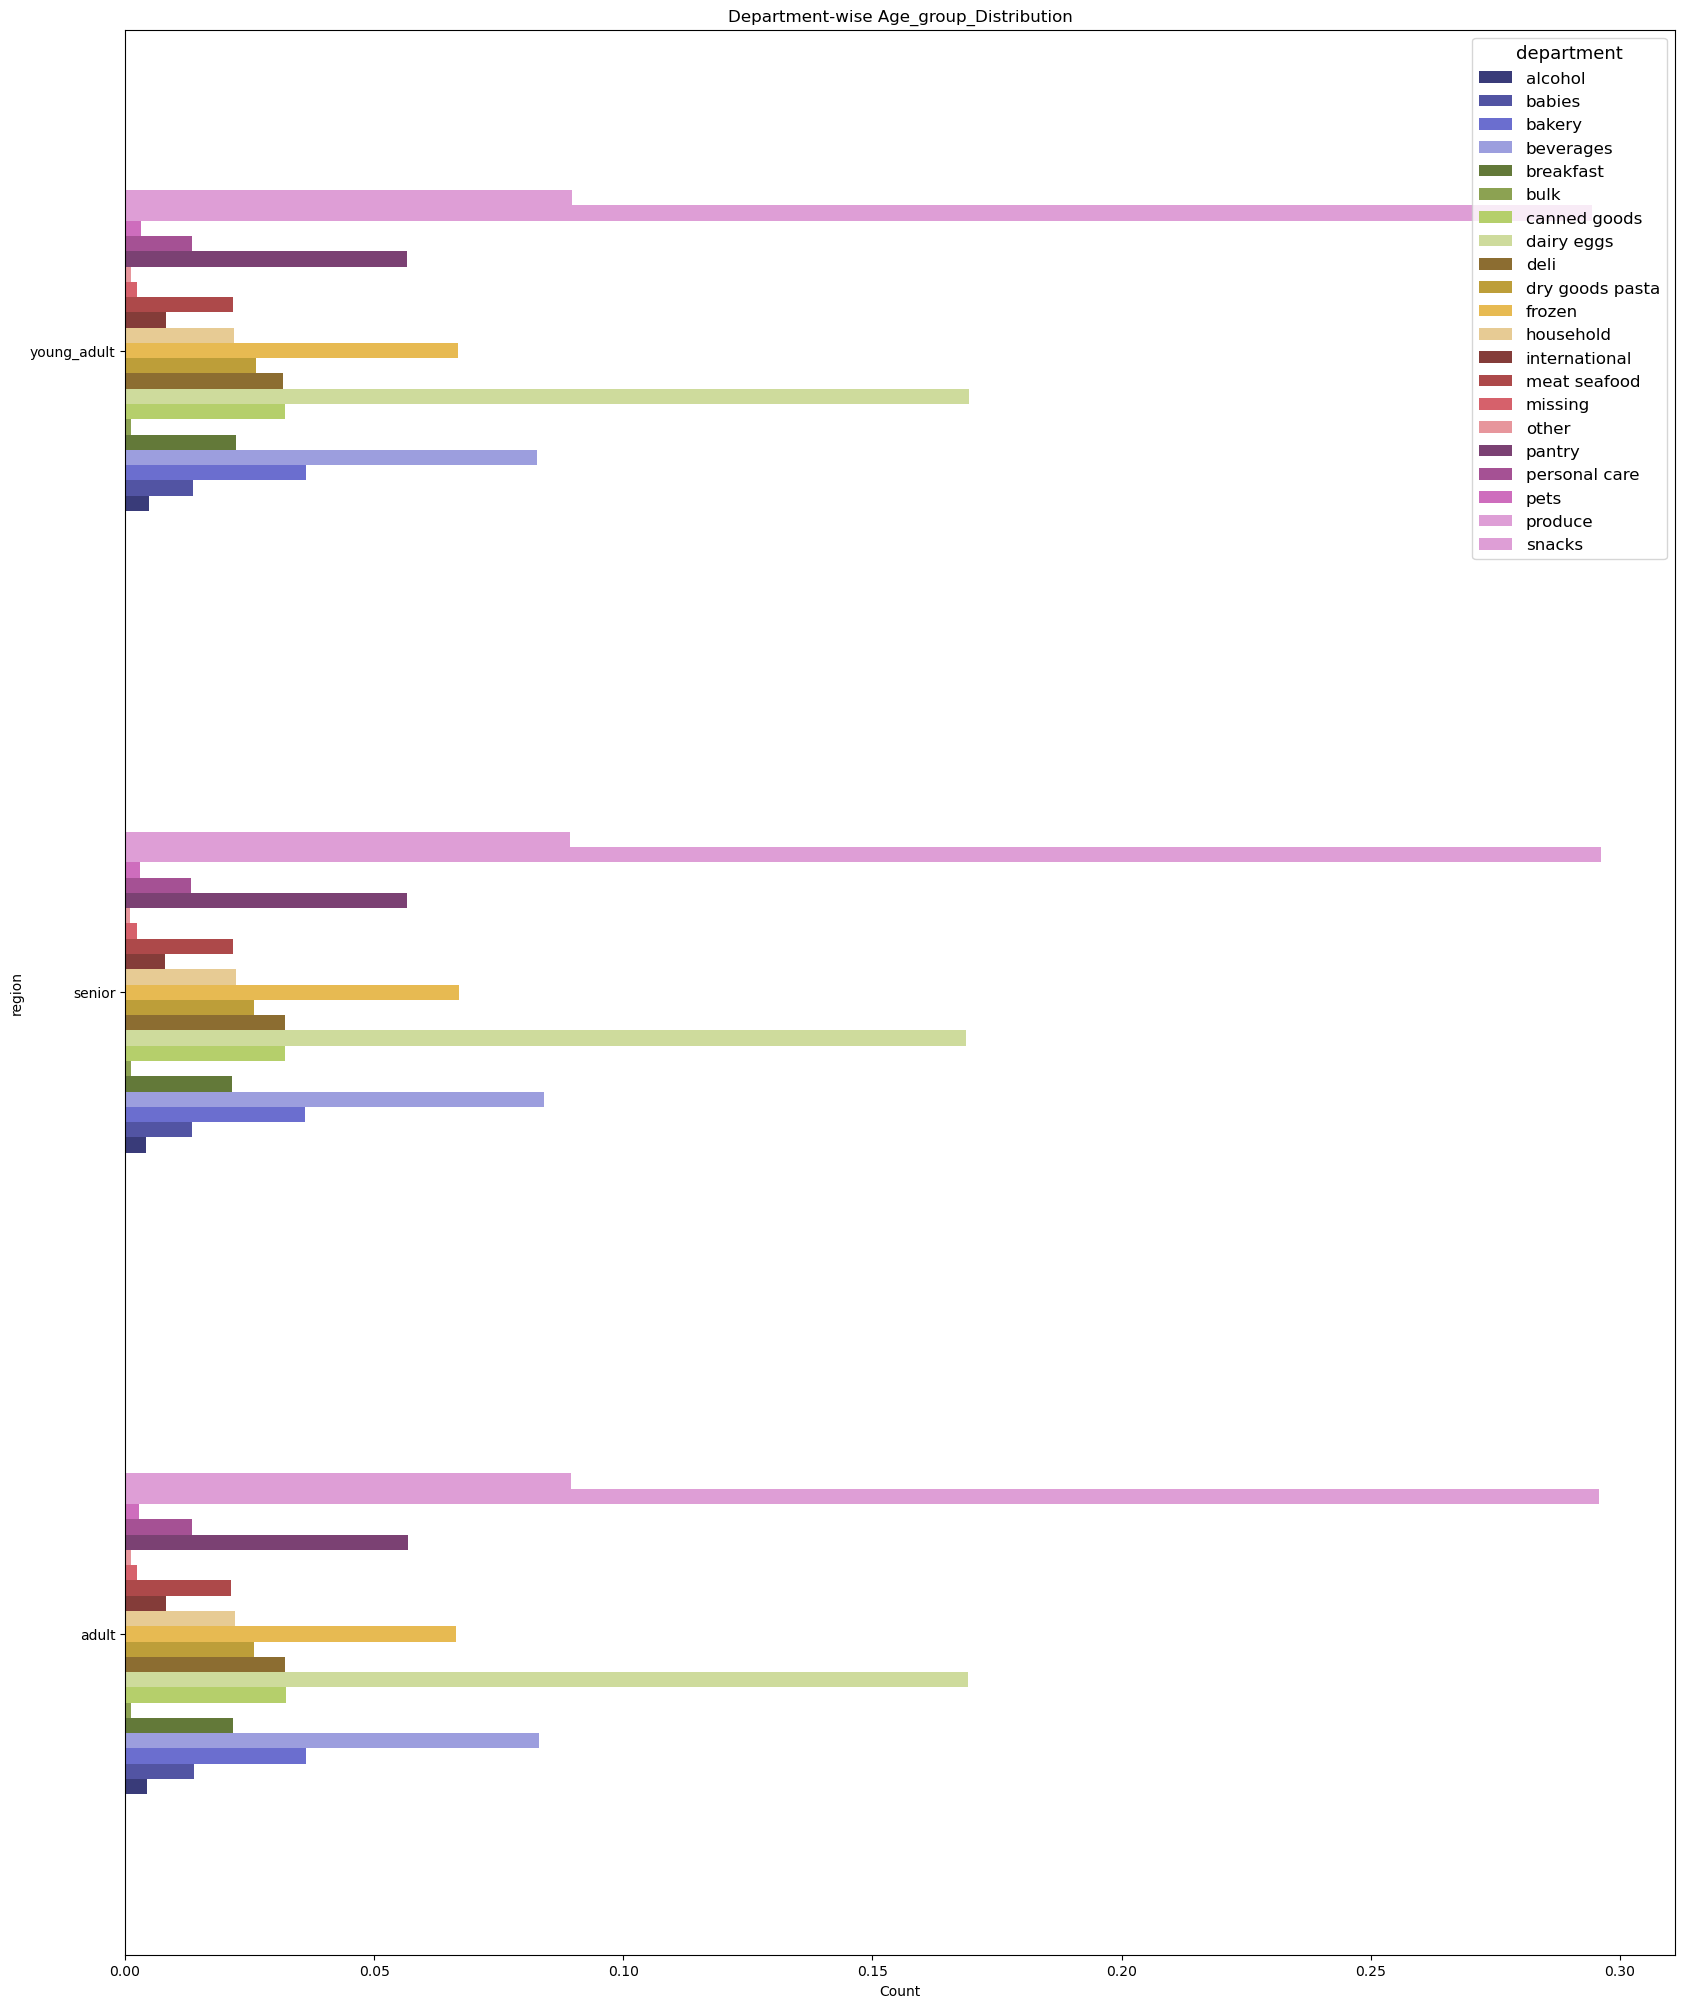

In [120]:
#Visualizing Age_group_department_crosstab
Age_group_department_bar=Age_group_department_crosstab.plot(kind='barh', stacked=False,figsize=(20,25),rot=0,colormap='tab20b')

# Adding titles and labels
plt.title('Department-wise Age_group_Distribution')
plt.xlabel('Count')
plt.ylabel('region')
plt.legend(title='department',title_fontsize='13', fontsize='12')

# Show the plot
plt.show()

In [95]:
#Export visualization
Age_group_department_bar.figure.savefig(os.path.join(path,'04 ANALYSIS','VISUALIZATIONS','department-wise_age_group_distribution.png'))

# Question 8 II. Income_group and Region|Department Relation

In [108]:
# Comparing income_group and region
income_group_region_crosstab= pd.crosstab(df_3['income_group'], df_3['region'], normalize='index')

In [106]:
#Printing income_group_region_crosstab
income_group_region_crosstab

region,Midwest,Northeast,South,West
income_group,,,,
high,0.275829,0.158301,0.335491,0.230379
low,0.232923,0.174348,0.341256,0.251474
low-middle,0.228636,0.176794,0.336379,0.258191
upper-middle,0.238668,0.177543,0.327702,0.256088


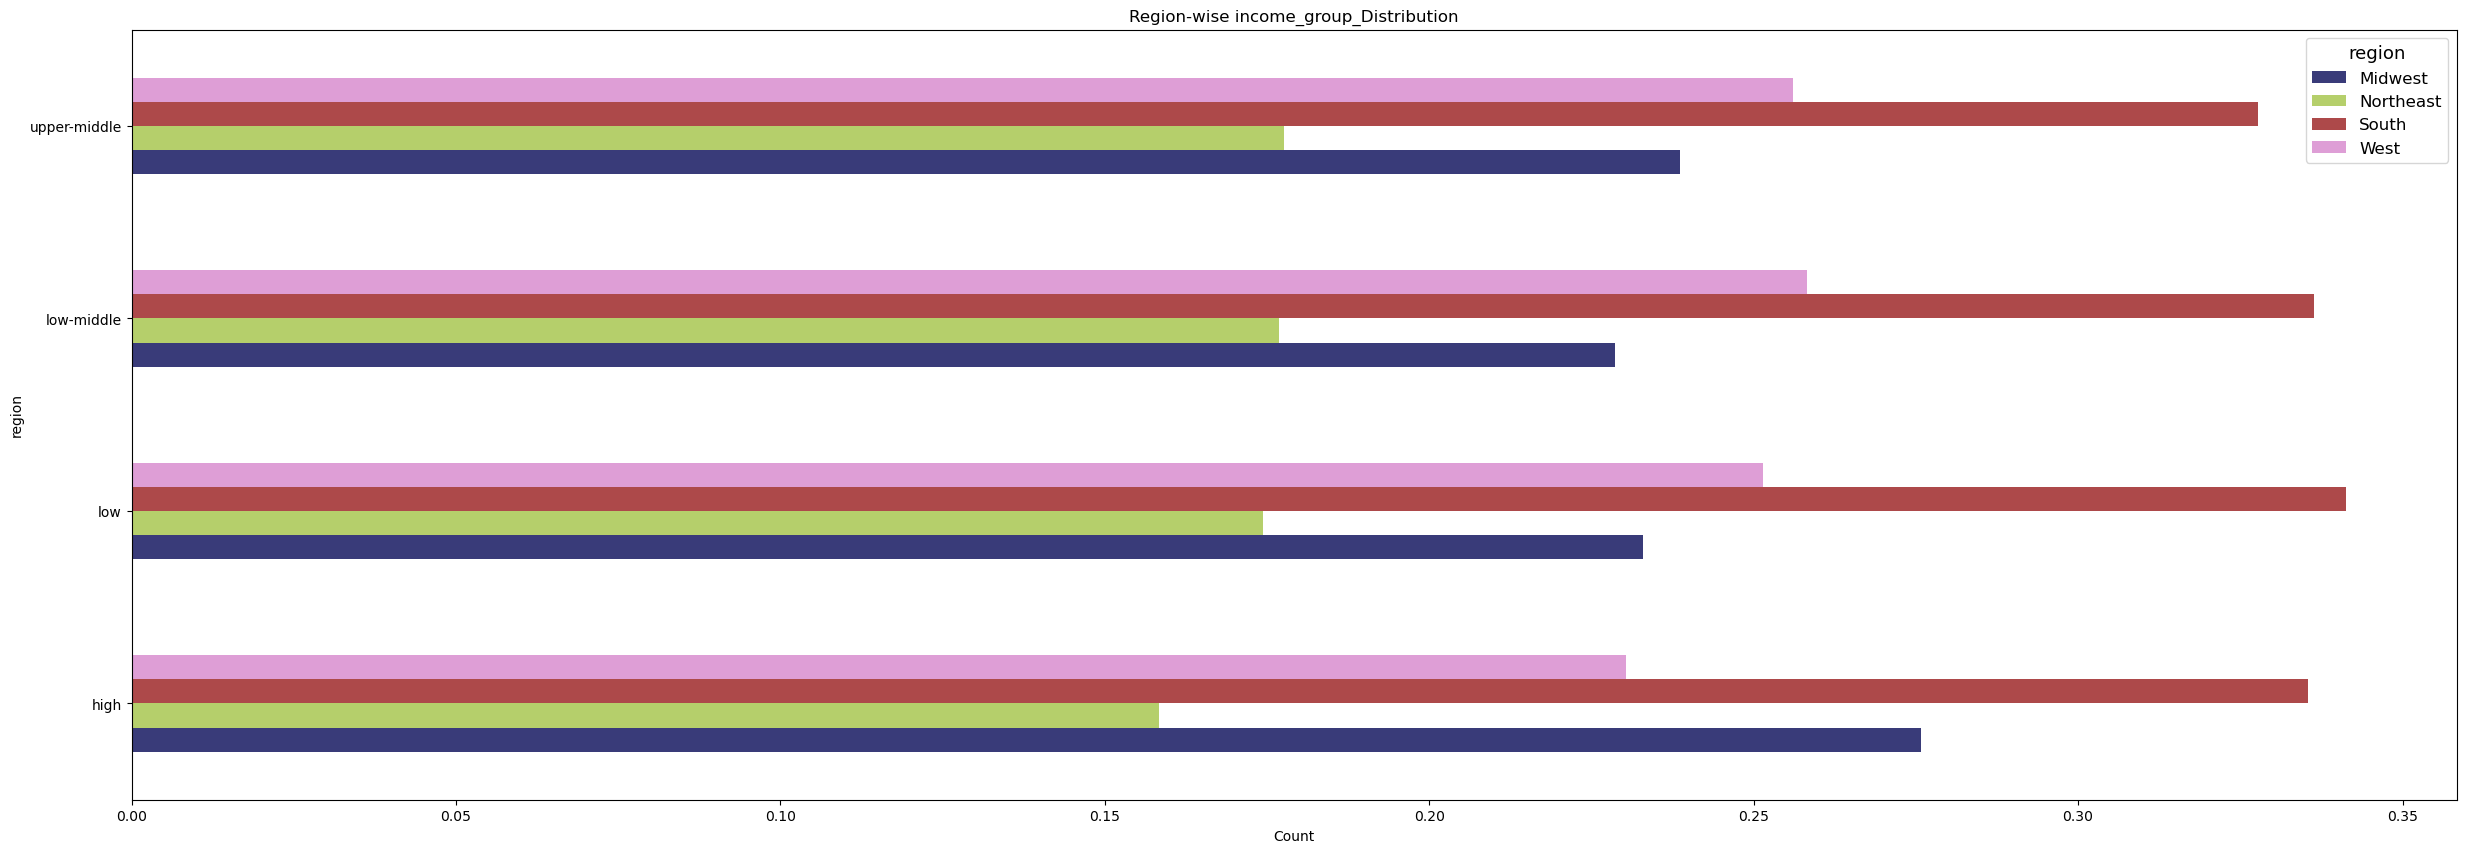

In [118]:
#Visualizing income_group_region_crosstab
income_group_region_bar=income_group_region_crosstab.plot(kind='barh', stacked=False,figsize=(30,10),rot=0,colormap='tab20b')

# Adding titles and labels
plt.title('Region-wise income_group_Distribution')
plt.xlabel('Count')
plt.ylabel('region')
plt.legend(title='region',title_fontsize='13', fontsize='12')

# Show the plot
plt.show()

In [104]:
#Export visualization
income_group_region_bar.figure.savefig(os.path.join(path,'04 ANALYSIS','VISUALIZATIONS','region-wise_income_group_distribution.png'))

In [110]:
# Comparing income_group and department
income_group_department_crosstab= pd.crosstab(df_3['income_group'], df_3['department'], normalize='index')

In [112]:
#Printing income_group_department_crosstab
income_group_department_crosstab

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
income_group,,,,,,,,,,,,,,,,,,,,,
high,0.026568,0.007942,0.049165,0.097137,0.024683,0.000067,0.036482,0.170180,0.028627,0.026930,...,0.046751,0.008626,0.023556,0.001274,0.001818,0.061601,0.015487,0.007257,0.205226,0.086123
low,0.004880,0.009006,0.031906,0.115417,0.027606,0.001482,0.022636,0.150931,0.031170,0.018161,...,0.025307,0.006267,0.009872,0.002212,0.001131,0.048199,0.013814,0.002542,0.247189,0.168764
low-middle,0.004033,0.014257,0.036375,0.079410,0.021049,0.001133,0.032999,0.171436,0.032120,0.026640,...,0.021358,0.008375,0.022381,0.002421,0.001104,0.057123,0.013450,0.002854,0.302496,0.082411
upper-middle,0.004384,0.014449,0.037052,0.079392,0.020910,0.001054,0.033702,0.171089,0.032219,0.027065,...,0.021664,0.008256,0.023218,0.002341,0.001105,0.058216,0.013327,0.003081,0.301881,0.077764


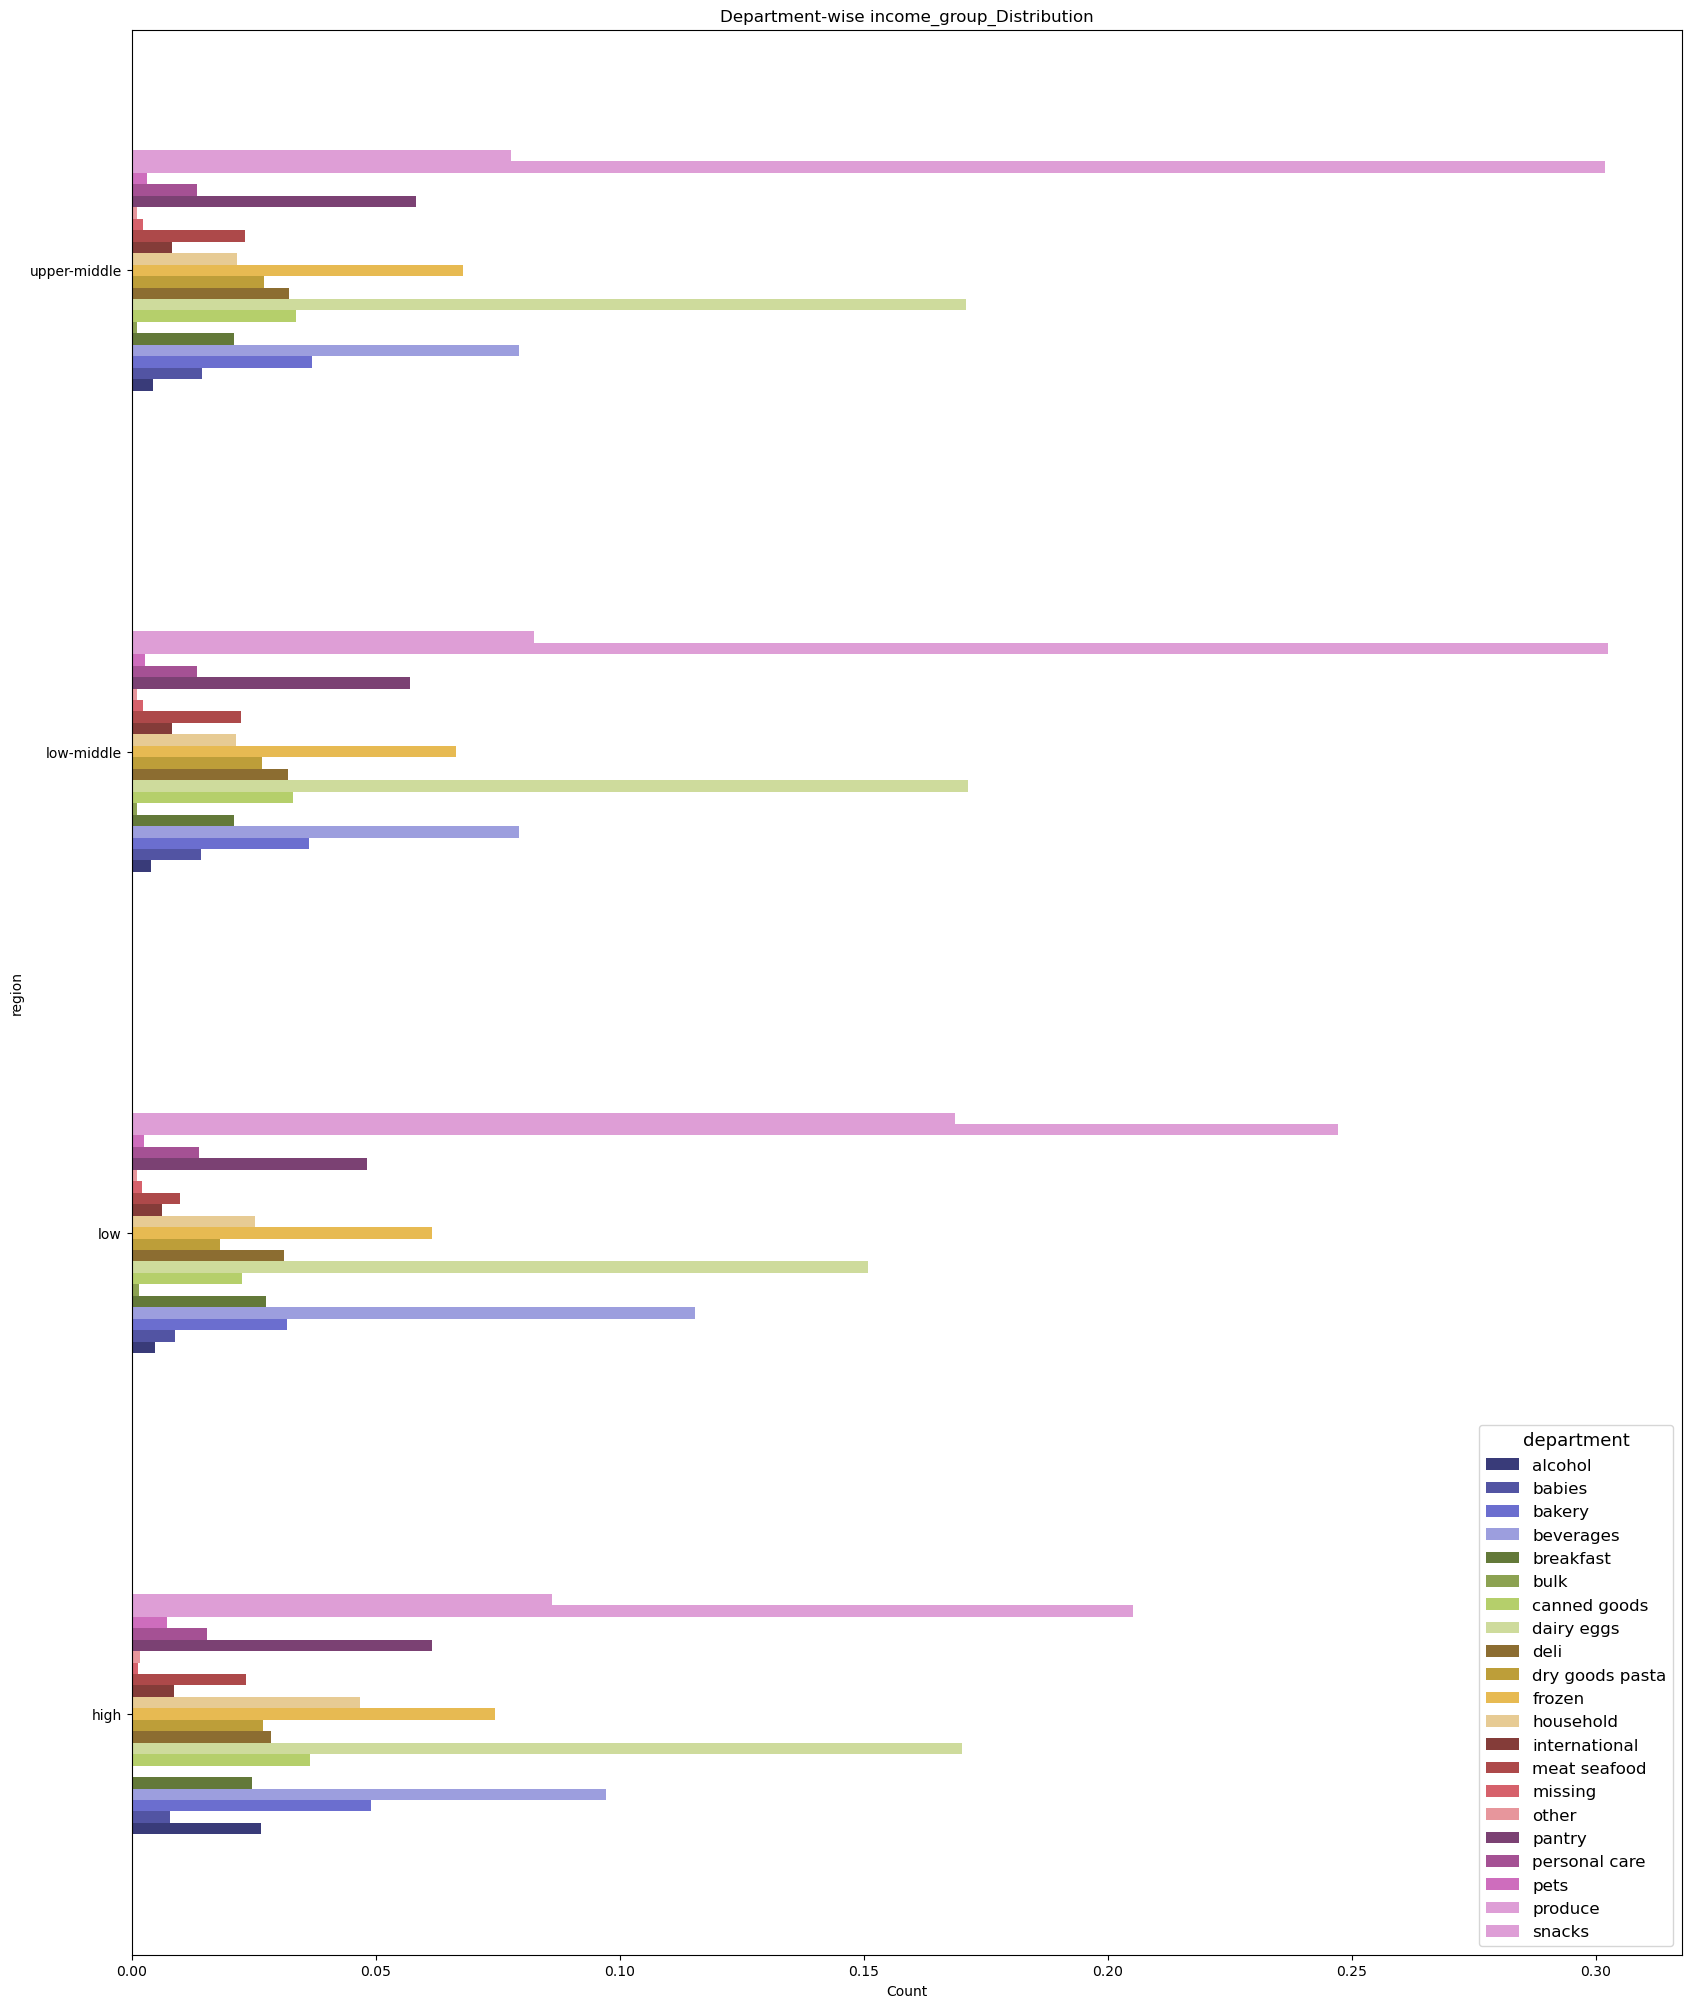

In [116]:
#Visualizing income_group_department_crosstab
income_group_department_bar=income_group_department_crosstab.plot(kind='barh', stacked=False,figsize=(20,25),rot=0,colormap='tab20b')

# Adding titles and labels
plt.title('Department-wise income_group_Distribution')
plt.xlabel('Count')
plt.ylabel('region')
plt.legend(title='department',title_fontsize='13', fontsize='12')

# Show the plot
plt.show()

In [124]:
#Export visualization
income_group_department_bar.figure.savefig(os.path.join(path,'04 ANALYSIS','VISUALIZATIONS','department-wise_income_group_distribution.png'))

# Question 8 III. Dependents_group and Region|Department Relations

In [127]:
# Comparing dependents_group and region
dependents_group_region_crosstab= pd.crosstab(df_3['dependents_group'], df_3['region'], normalize='index')

In [129]:
#Printing dependents_group_region_crosstab
dependents_group_region_crosstab

region,Midwest,Northeast,South,West
dependents_group,,,,
old_parent,0.228453,0.178416,0.332515,0.260617
single_adult,0.235364,0.174476,0.333878,0.256283
young_parent,0.235971,0.177073,0.332714,0.254242


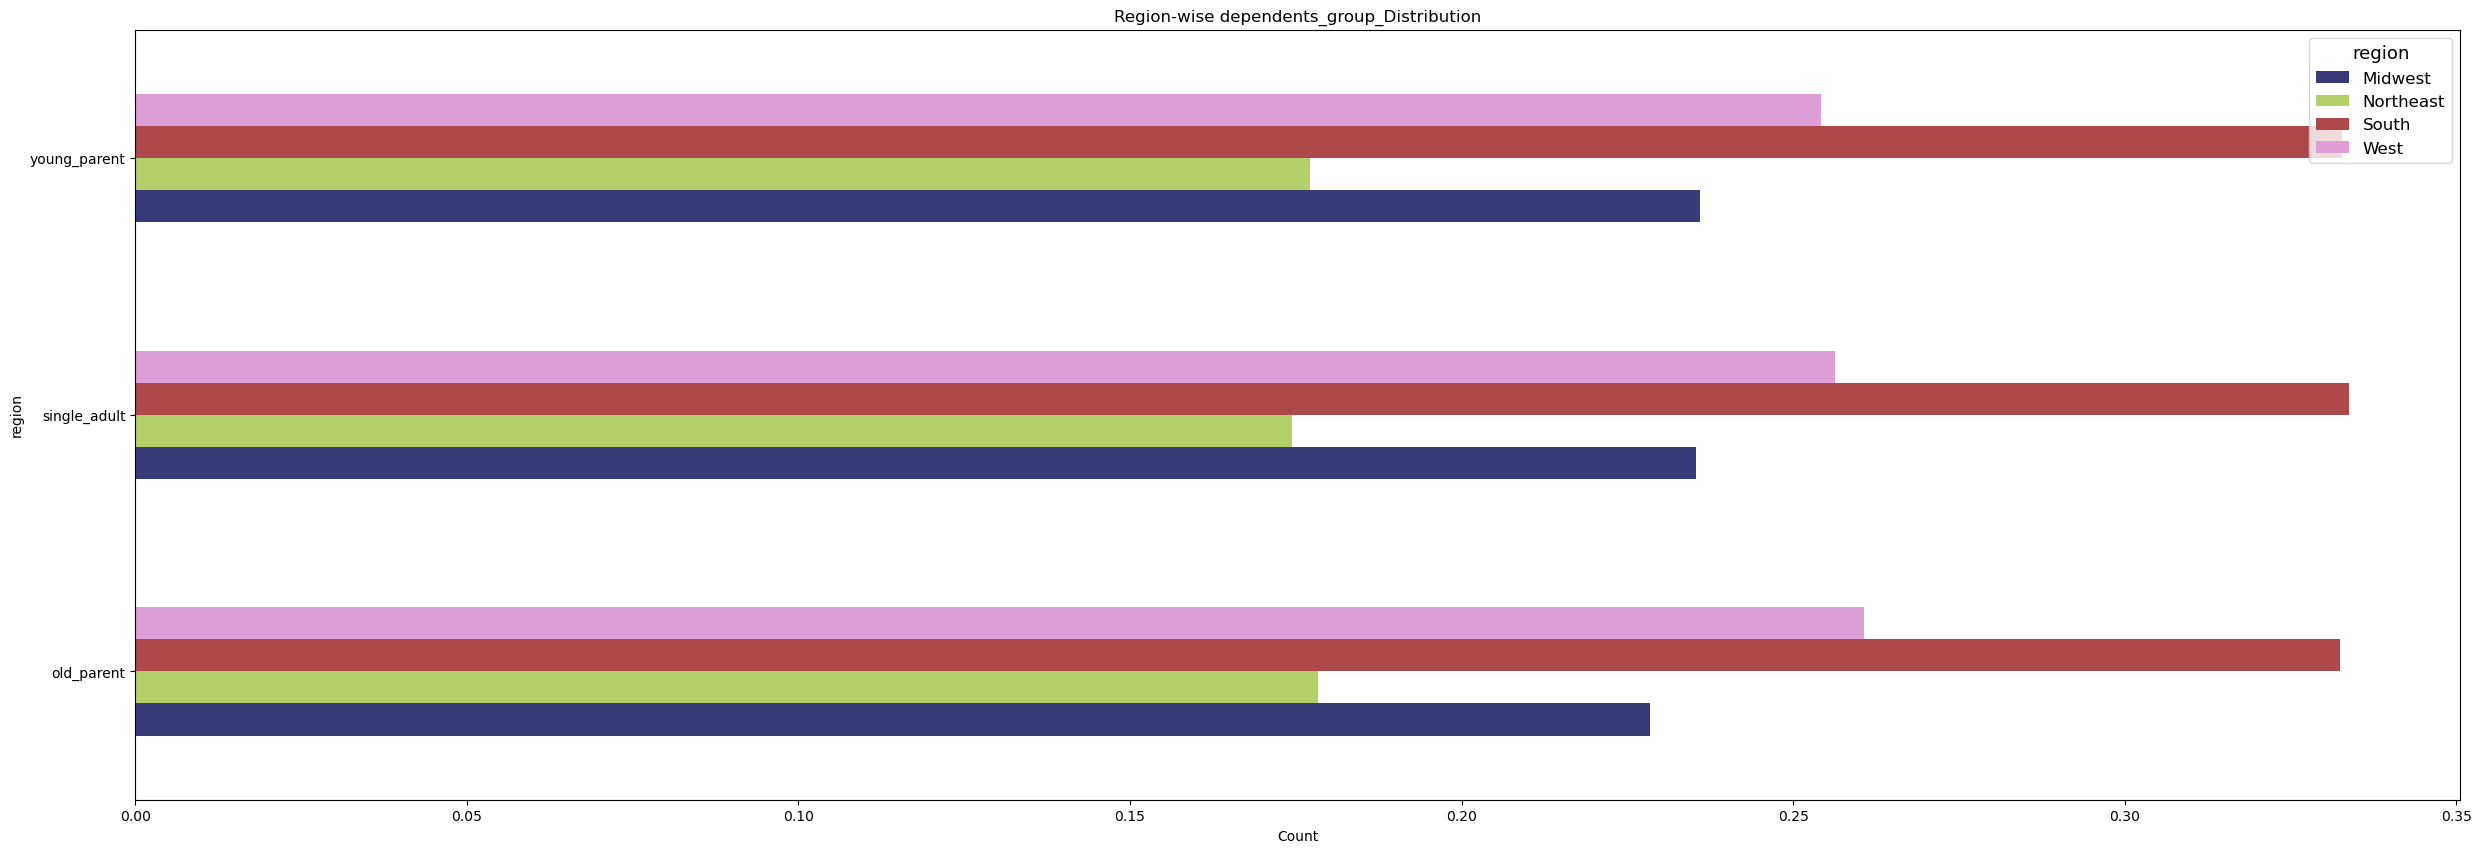

In [131]:
#Visualizing dependents_group_region_crosstab
dependents_group_region_bar=dependents_group_region_crosstab.plot(kind='barh', stacked=False,figsize=(30,10),rot=0,colormap='tab20b')

# Adding titles and labels
plt.title('Region-wise dependents_group_Distribution')
plt.xlabel('Count')
plt.ylabel('region')
plt.legend(title='region',title_fontsize='13', fontsize='12')

# Show the plot
plt.show()

In [133]:
#Export visualization
dependents_group_region_bar.figure.savefig(os.path.join(path,'04 ANALYSIS','VISUALIZATIONS','region-wise_dependents_group_distribution.png'))

In [135]:
# Comparing dependents_group and departments
dependents_group_departments_crosstab= pd.crosstab(df_3['dependents_group'], df_3['department'], normalize='index')

In [137]:
#Printing dependents_group__departments_crosstab
dependents_group_departments_crosstab

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
dependents_group,,,,,,,,,,,,,,,,,,,,,
old_parent,0.004563,0.013726,0.036144,0.082477,0.021593,0.001134,0.032373,0.168556,0.032162,0.026188,...,0.022120,0.007993,0.021783,0.002380,0.001077,0.056591,0.013415,0.002964,0.296918,0.089109
single_adult,0.004578,0.013797,0.036408,0.083796,0.021534,0.001078,0.031984,0.169095,0.032401,0.025760,...,0.021627,0.008188,0.020980,0.002313,0.001135,0.056517,0.013482,0.002987,0.296670,0.089258
young_parent,0.004268,0.013734,0.036295,0.083538,0.021847,0.001149,0.032297,0.169360,0.031802,0.025892,...,0.022269,0.008107,0.021495,0.002365,0.001117,0.056843,0.013443,0.002927,0.294693,0.089820


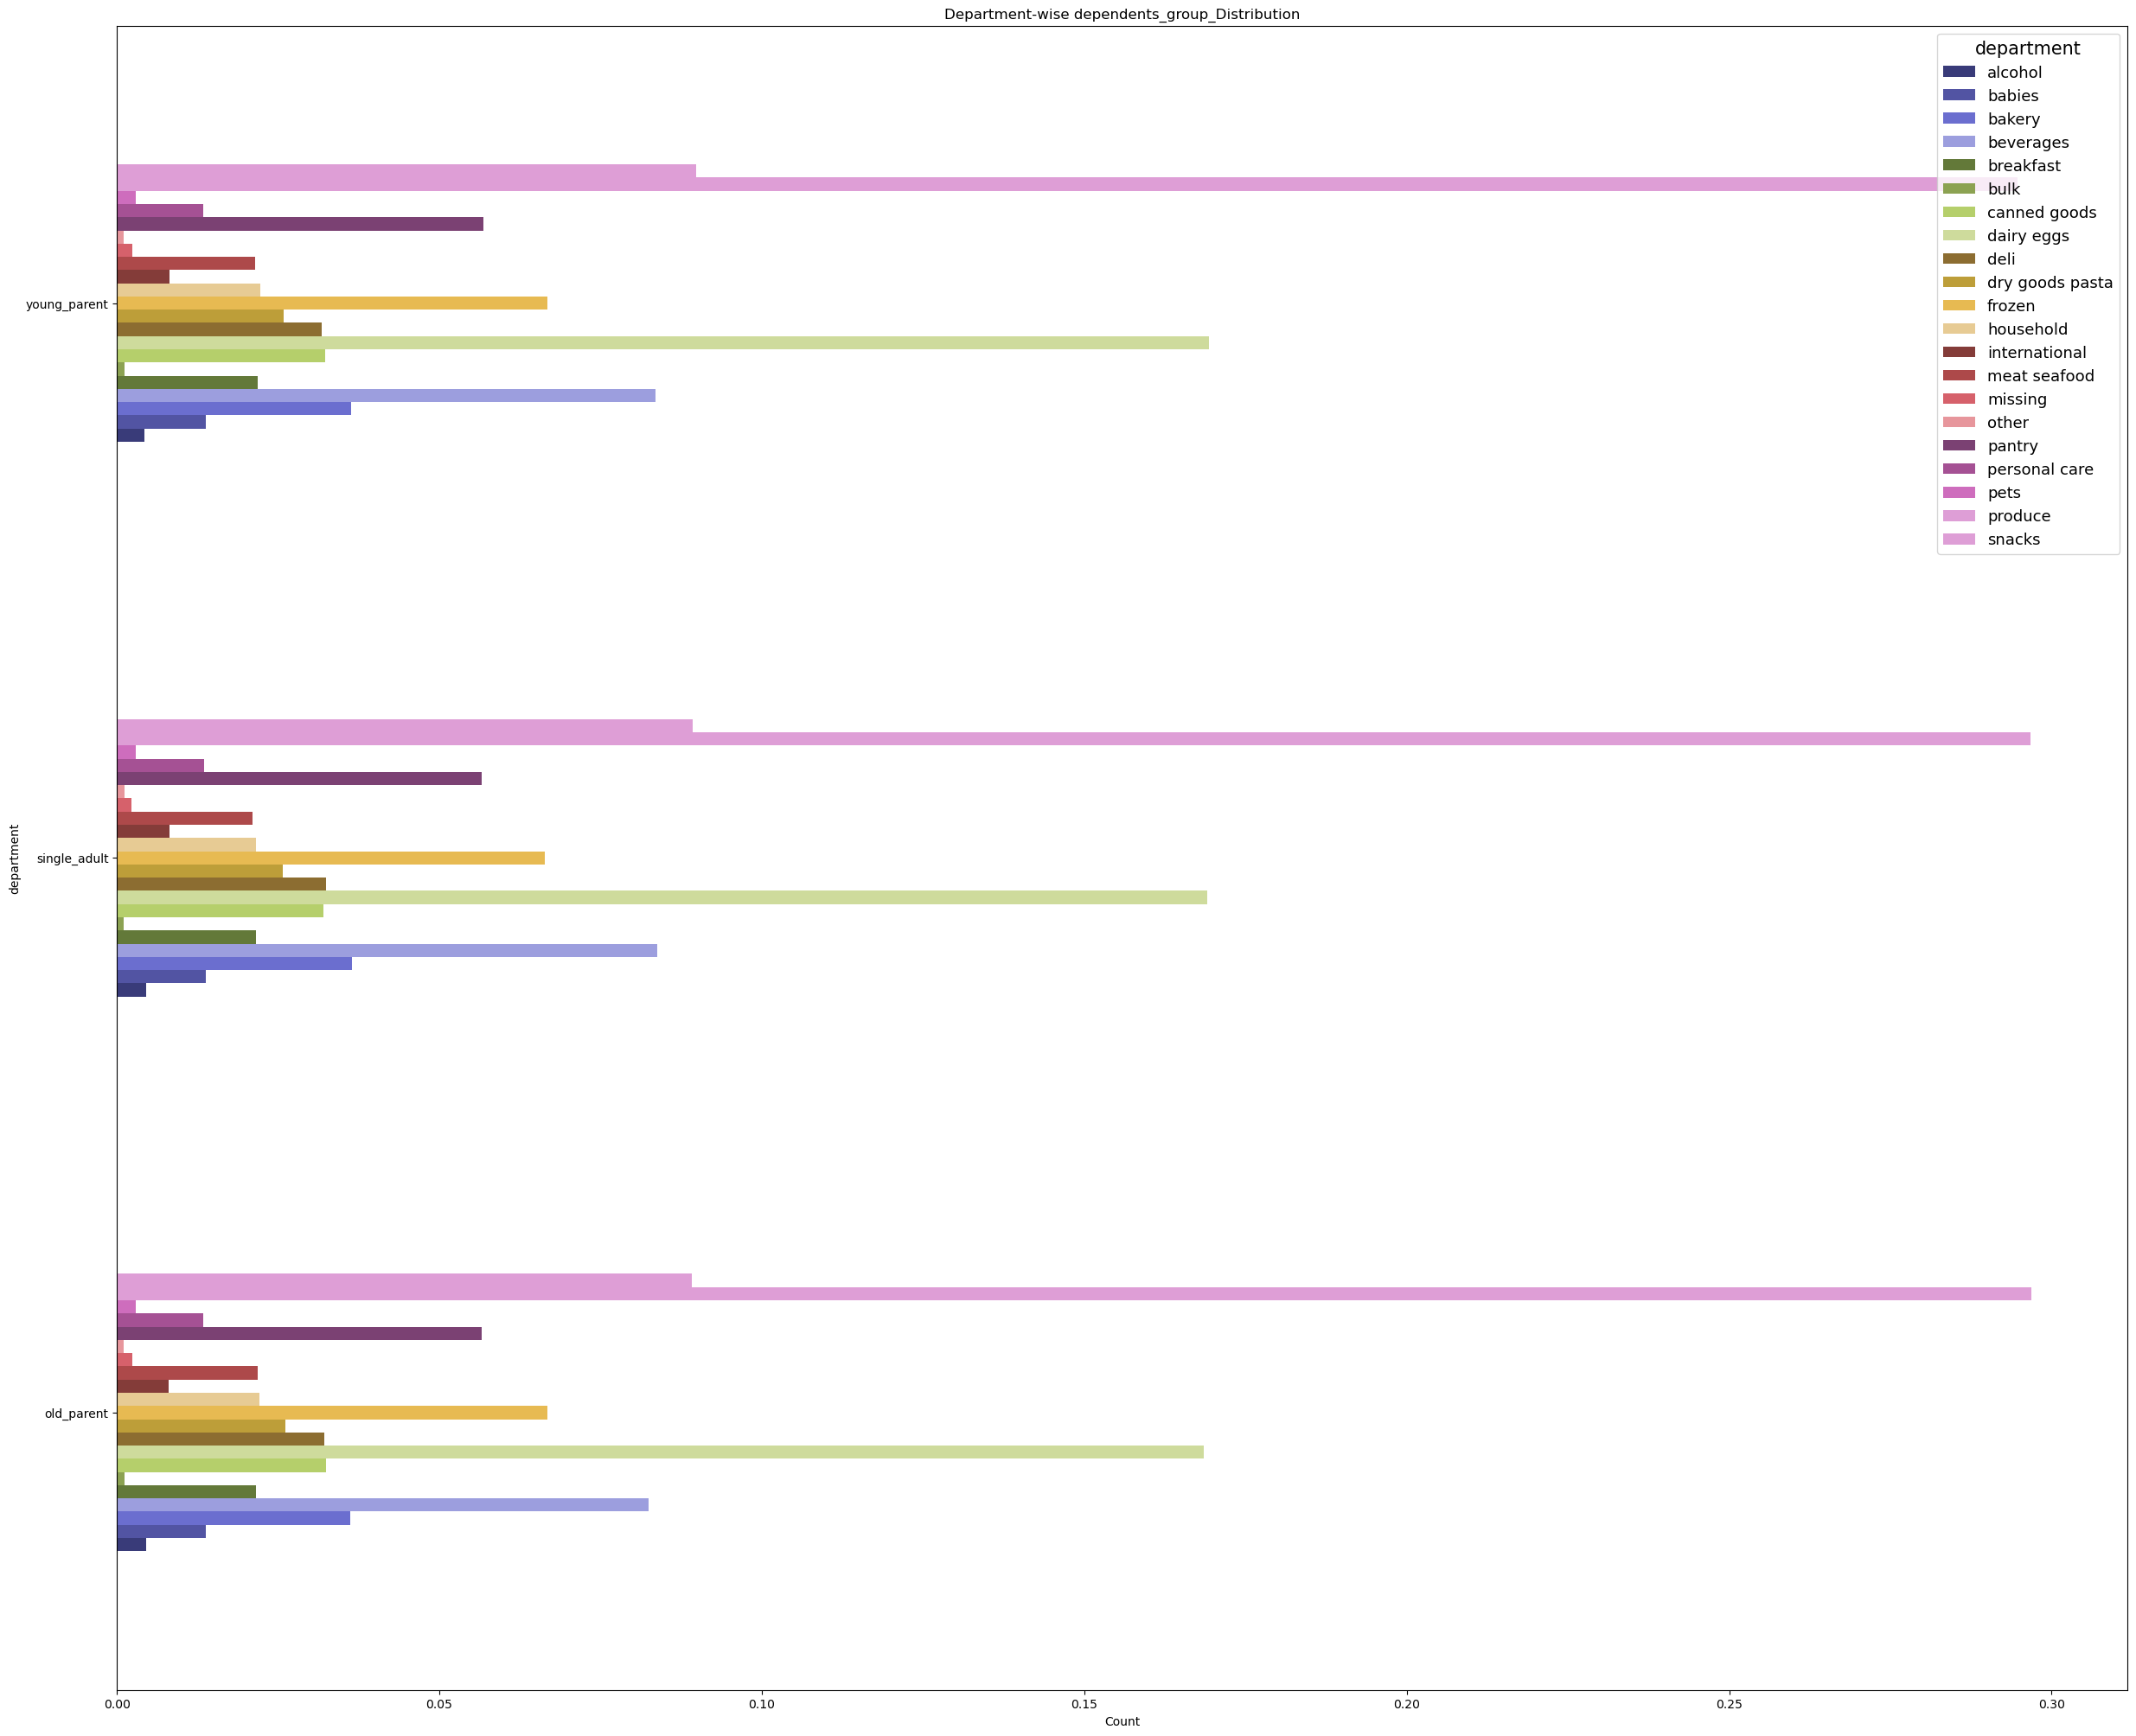

In [147]:
#Visualizing dependents_group_departments_crosstab
dependents_group_department_bar=dependents_group_departments_crosstab.plot(kind='barh', stacked=False,figsize=(30,25),rot=0,colormap='tab20b')

# Adding titles and labels
plt.title('Department-wise dependents_group_Distribution')
plt.xlabel('Count')
plt.ylabel('department')
plt.legend(title='department',title_fontsize='15', fontsize='13')

# Show the plot
plt.show()

In [151]:
#Export visualization
dependents_group_department_bar.figure.savefig(os.path.join(path,'04 ANALYSIS','VISUALIZATIONS','departments-wise_dependents_group_distribution.png'))